## NumPy

#### 주요 포인트: 수를 다루는 라이브러리

In [1]:
import numpy as np

t = np.linspace(1,20,10)
t

array([ 1.        ,  3.11111111,  5.22222222,  7.33333333,  9.44444444,
       11.55555556, 13.66666667, 15.77777778, 17.88888889, 20.        ])

## Matplotlib

#### 주요 포인트: 시각화 지원 라이브러리

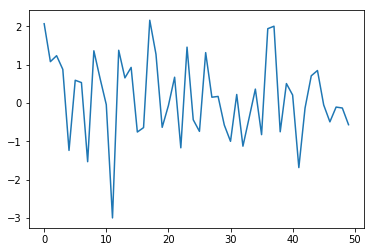

In [2]:
#필요 라이브러리 정의
import numpy as np
import matplotlib.pyplot as plt

# 커맨드뷰에서 차트 시여
%matplotlib inline
# 팝업 창 활용하여 차트 시연
# %matplotlib tk
size = 50
#사이즈만큰 랜덤한 데이터 생성 (정규분포: 평균0, 표준편차1)
y=np.random.standard_normal(size)
x=range(size)
plt.plot(x,y)
plt.show()

## Pandas

#### 주요 포인트: 데이터프레임 핸들링 라이브러리

2019-06-20


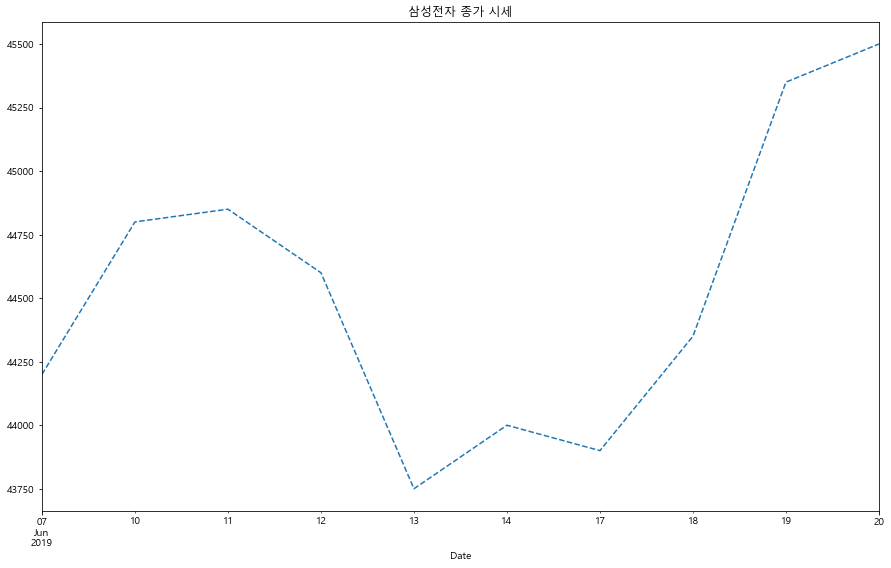

chart ok


In [3]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

today = date.today()
start = date.today() - timedelta(14)
yesterday = date.today() - timedelta(1)
print(yesterday)
SEC = web.DataReader("005930", start, yesterday)
SEC['Close'].plot(style='--')
plt.title('삼성전자 종가 시세')
plt.show()

print("chart ok")

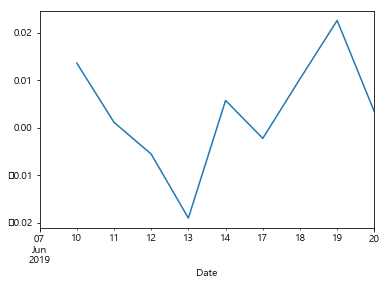

In [4]:
returns = SEC['Close'].pct_change()
returns.plot()

## 주가정보 가져오기

2019-06-20
              Open    High     Low   Close  Volume    Change
Date                                                        
2019-06-14  316500  316500  312000  313000   67881 -0.011058
2019-06-17  311500  314000  308000  309000   36986 -0.012780
2019-06-18  309500  316000  309500  314000   68834  0.016181
2019-06-19  316000  318000  313000  315000   51459  0.003185
2019-06-20  315500  317500  315000  317000   46507  0.006349


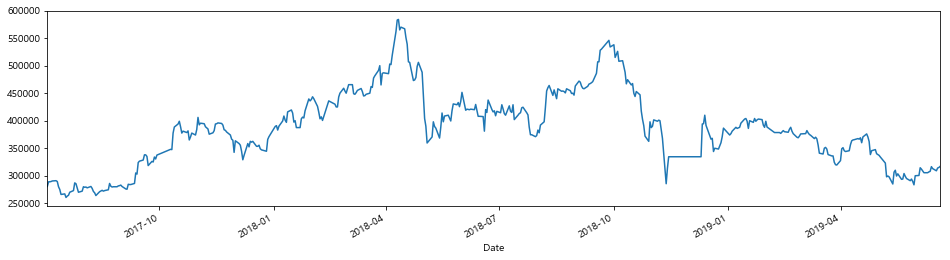

In [5]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

today = date.today()
startday = date.today() - timedelta(720)
yesterday = date.today() - timedelta(1)
#startday = '3/14/2014'
#yesterday = '4/14/2016'
print(yesterday)
#GoogleDailyReader??

SEC = web.DataReader("207940", startday, yesterday)
#SEC = web.get_data_yahoo("005930.KS", startday, yesterday)
print(SEC.tail())
SEC['Close'].plot(figsize=(16,4))
plt.show()

In [17]:
#2017년도 3월
SEC['2017-03'].head()

#2017년도 1분기
SEC['2017-01-01':'2017-03-31'].head()

#상반기
SEC[:'2017-06-30'].head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-11-27,162000,162000,162000,162000,90.0,0.0000
2016-11-28,161500,161000,165500,159000,406620.0,-0.0031
2016-11-29,157000,157500,159000,151000,892520.0,-0.0279
2016-11-30,154000,156000,158500,150500,2440000.0,-0.0191
2016-12-01,144500,153500,154000,144000,835550.0,-0.0617


###  (2017년도 수정주가 타임시리즈)

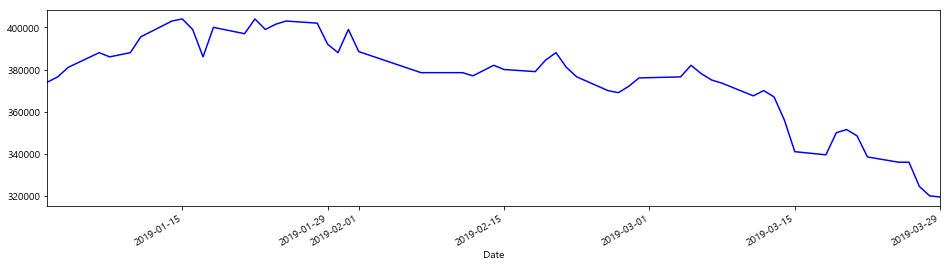

In [6]:
SEC['2019-01-01':'2019-03-31']['Close'].plot(figsize=(16,4), style='b')
plt.show()

### (2017년도 거래량 타임시리즈)

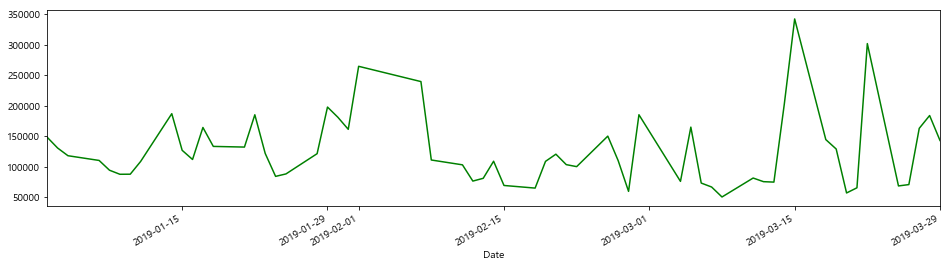

In [7]:
SEC['2019-01-01':'2019-03-31']['Volume'].plot(figsize=(16,4), style='g')
plt.show()

## 수익률 계산

In [14]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

today = date.today()
#startday = date(2018,4,1)
#endday = date(2018,6,27)
# plot index
endday = date.today()
startday = date.today() - timedelta(120) 
#SEC = SEC[plot_start:plot_end]

SEC = web.DataReader("207940", startday, endday)

SEC = SEC[SEC['Volume'] != 0]
SEC['Close'].head()

# 1 씩 shift
SEC['Close'].shift(1).head()

# 수익률 계산
SEC['Rate'] = np.log( SEC['Close']) - np.log(SEC['Close'].shift(1))
SEC.tail()


,Open,High,Low,Close,Volume,Change,Rate
Date,,,,,,,
2019-06-17,311500,314000,308000,309000,36986,-0.012780,-0.012862
2019-06-18,309500,316000,309500,314000,68834,0.016181,0.016052
2019-06-19,316000,318000,313000,315000,51459,0.003185,0.003180
2019-06-20,315500,317500,315000,317000,46507,0.006349,0.006329
2019-06-21,317500,318000,315000,315500,22987,-0.004732,-0.004743


<Figure size 1080x648 with 0 Axes>

In [8]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

today = date.today()
#startday = date(2018,4,1)
#endday = date(2018,6,27)
# plot index
endday = date.today()
startday = date.today() - timedelta(120) 
#SEC = SEC[plot_start:plot_end]

SEC = web.DataReader("207940", startday, endday)

SEC = SEC[SEC['Volume'] != 0]
SEC['Close'].head()

# 1 씩 shift
SEC['Close'].shift(1).head()

# 수익률 계산
SEC['Rate'] = np.log( SEC['Close'].astype(float) / SEC['Close'].shift(1).astype(float))
SEC.tail()


,Open,High,Low,Close,Volume,Change,Rate
Date,,,,,,,
2019-06-17,311500,314000,308000,309000,36986,-0.012780,-0.012862
2019-06-18,309500,316000,309500,314000,68834,0.016181,0.016052
2019-06-19,316000,318000,313000,315000,51459,0.003185,0.003180
2019-06-20,315500,317500,315000,317000,46507,0.006349,0.006329
2019-06-21,317500,318000,315000,315500,22827,-0.004732,-0.004743


<Figure size 1080x648 with 0 Axes>

In [21]:
SEC['Close'].shift(1).head()

Date
2018-04-02         NaN
2018-04-03    486000.0
2018-04-04    485500.0
2018-04-05    503000.0
2018-04-06    502000.0
Name: Close, dtype: float64

In [22]:
#SEC = SEC.dropna(axis=0)
SEC.head()

,Close,Open,High,Low,Volume,Change,Rate
Date,,,,,,,
2018-04-02,486000,487000,490000,482500,90650.0,-0.0021,NaN
2018-04-03,485500,484000,489500,480000,127370.0,-0.0010,-0.001029
2018-04-04,503000,490000,505000,486000,304040.0,0.0360,0.035411
2018-04-05,502000,501000,505000,496500,192790.0,-0.0020,-0.001990
2018-04-06,519000,509000,534000,508000,289480.0,0.0339,0.033304


## 수익률 변동

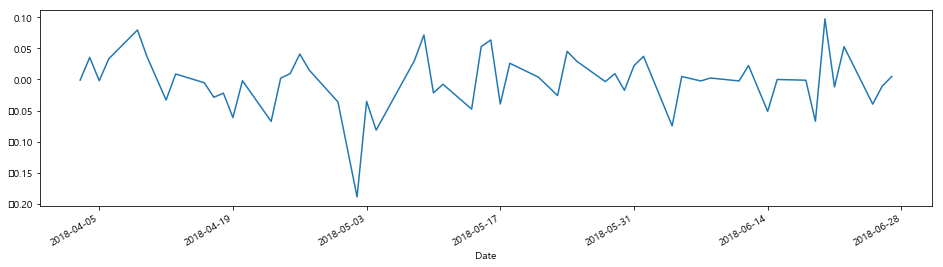

In [23]:
#수익률 변동 계산
#plt.axhline(color='k')
SEC['Rate'].plot(figsize=(16,4))
plt.show()

In [24]:
SEC.describe()

,Close,Open,High,Low,Volume,Change,Rate
count,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,57.000000
mean,450293.103448,450750.000000,463353.448276,440405.172414,4.168560e+05,-0.001631,-0.002644
std,60676.958435,60522.523718,60042.383321,59742.169486,3.928414e+05,0.044595,0.046005
min,359500.000000,357000.000000,384500.000000,350000.000000,9.065000e+04,-0.172100,-0.188901
25%,408125.000000,410125.000000,419500.000000,401000.000000,2.017925e+05,-0.024650,-0.025943
50%,423250.000000,426500.000000,436500.000000,418250.000000,2.918600e+05,-0.001100,-0.001029
75%,495875.000000,498250.000000,504250.000000,485750.000000,4.654075e+05,0.025450,0.026040
max,584000.000000,587000.000000,600000.000000,565000.000000,2.320000e+06,0.102400,0.097455


### (수익률 분포)

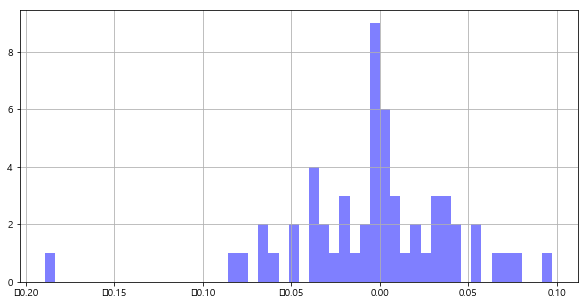

In [25]:
# 수익률의 분포
SEC['Rate'].hist(bins=50, color='b', alpha=0.5, figsize = (10,5))
plt.show()

## 이동평균

In [26]:
SEC['MA_5']=SEC['Close'].rolling(window=5).mean()
SEC['MA_20']=SEC['Close'].rolling(window=20).mean()
SEC['diff']=SEC['MA_5']-SEC['MA_20']
SEC.tail(5)
    

,Close,Open,High,Low,Volume,Change,Rate,MA_5,MA_20,diff
Date,,,,,,,,,,
2018-06-21,415000,420000,426000,411000,152920.0,-0.0119,-0.011976,406300.0,419600.0,-13300.0
2018-06-22,437500,419500,445500,415500,344810.0,0.0542,0.052798,412200.0,421500.0,-9300.0
2018-06-25,420500,438000,438500,418000,165000.0,-0.0389,-0.039632,414800.0,421625.0,-6825.0
2018-06-26,416000,410000,419000,400500,217020.0,-0.0107,-0.010759,421800.0,420900.0,900.0
2018-06-27,418000,414500,426500,413000,115660.0,0.0048,0.004796,421400.0,420350.0,1050.0


## 골든크로스, 데드크로스

In [27]:
SEC = SEC[ ['Open','High','Low','Close','Volume','MA_5','MA_20','diff']]

In [28]:
SEC.tail()

,Open,High,Low,Close,Volume,MA_5,MA_20,diff
Date,,,,,,,,
2018-06-21,420000,426000,411000,415000,152920.0,406300.0,419600.0,-13300.0
2018-06-22,419500,445500,415500,437500,344810.0,412200.0,421500.0,-9300.0
2018-06-25,438000,438500,418000,420500,165000.0,414800.0,421625.0,-6825.0
2018-06-26,410000,419000,400500,416000,217020.0,421800.0,420900.0,900.0
2018-06-27,414500,426500,413000,418000,115660.0,421400.0,420350.0,1050.0


In [29]:
pre_key = prev_val = 0
for key,val in SEC['diff'][1:].iteritems():
    if val == 0:
        continue
    if val * prev_val < 0 and val > prev_val:
        print('[golden]', key, val)
    if val * prev_val < 0 and val < prev_val:
        print('[dead]', key, val)
    prev_key, prev_val = key, val

[golden] 2018-05-28 00:00:00 4650.0
[dead] 2018-06-15 00:00:00 -2650.0
[golden] 2018-06-26 00:00:00 900.0


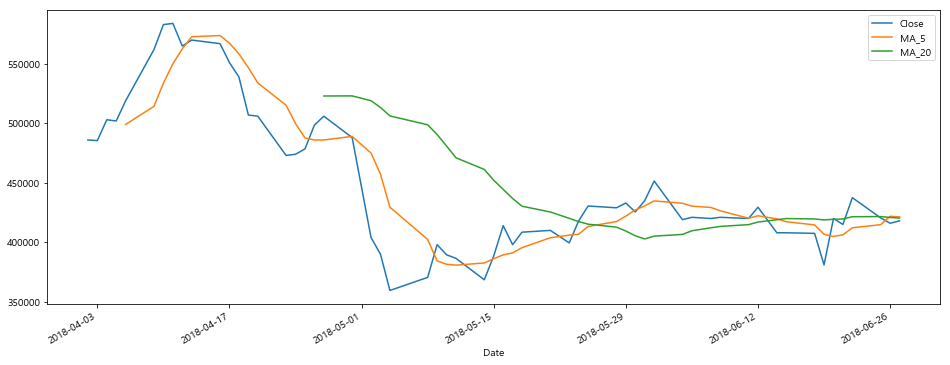

In [30]:
ax=SEC[['Close','MA_5','MA_20']].plot(figsize = (16,6))


In [31]:
SEC.tail()

,Open,High,Low,Close,Volume,MA_5,MA_20,diff
Date,,,,,,,,
2018-06-21,420000,426000,411000,415000,152920.0,406300.0,419600.0,-13300.0
2018-06-22,419500,445500,415500,437500,344810.0,412200.0,421500.0,-9300.0
2018-06-25,438000,438500,418000,420500,165000.0,414800.0,421625.0,-6825.0
2018-06-26,410000,419000,400500,416000,217020.0,421800.0,420900.0,900.0
2018-06-27,414500,426500,413000,418000,115660.0,421400.0,420350.0,1050.0


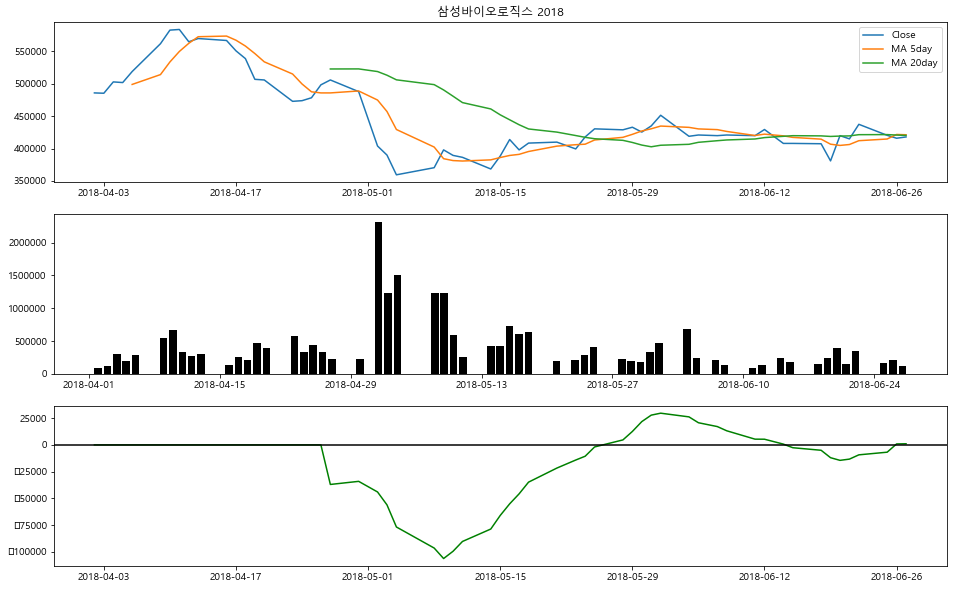

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (16,10))

#price (가격)
plt.subplot(311)
plt.plot(SEC.index, SEC['Close'], label = 'Close')
plt.plot(SEC.index, SEC['MA_5'], label='MA 5day')
plt.plot(SEC.index, SEC['MA_20'], label='MA 20day')
plt.title(u'삼성바이오로직스 2018')
plt.legend(loc='best')

# volume (거래량)
plt.subplot(312)
plt.bar(SEC.index, SEC['Volume'], color='black')

#  이동평균 차이 (diff)
diffChart = plt.subplot(313)
diffChart.plot(SEC.index, SEC['diff'].fillna(0), color='g')
plt.axhline(y=0, color='k')